## Fetching data

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
x , y = mnist["data"], mnist["target"]


In [4]:
x.shape

(70000, 784)

In [5]:
x.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [6]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x.loc[36060]   #extrating particular row
some_digit_aar = some_digit.values # coverting pandas dataframe to numpy array
some_digit_image = some_digit_aar.reshape(28,28) # reshape in 28x 28 

(-0.5, 27.5, 27.5, -0.5)

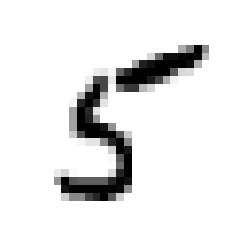

In [9]:
plt.imshow(some_digit_image, cmap =matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [10]:
x.loc[0]


pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [11]:
import numpy as np
shuffle_index = np.random.permutation(70000)  #generates a shuffled indexing 
x= x.loc[shuffle_index]
y = y.loc[shuffle_index]

In [12]:
x.shape

(70000, 784)

In [13]:
x_train , x_test = x[:60000], x[60000 :]
y_train , y_test = y[:60000], y[60000 :]

In [14]:
x_train.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [15]:
y_train.loc[5]  

'2'

## creating a 2 detector

In [16]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test ==2)

In [17]:
y_train_arr = np.array(y_train)

In [18]:
y_train_arr

array([8, 6, 7, ..., 7, 0, 3], dtype=int8)

In [19]:
y_train_2

46216    False
59892    False
64540    False
60089    False
38573    False
         ...  
31302    False
69304     True
33676    False
1403     False
64873    False
Name: class, Length: 60000, dtype: bool

In [20]:
y_train_arr.shape

(60000,)

In [21]:
from sklearn.linear_model import LogisticRegression  # logisticRegression is a classifier

In [22]:
clf = LogisticRegression( tol =0.1)

In [23]:
clf.fit(x_train, y_train_2)

c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
clf.predict([some_digit])

c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train_2, cv = 3 , scoring= "accuracy")

c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.9786 , 0.97585, 0.97875])

In [26]:
 y_train_arr.shape

(60000,)

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, x_train, y_train_2, cv = 3)

c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [28]:
y_train_predict

array([False, False, False, ..., False, False, False])

## calculating confusion matrix 

In [29]:
from sklearn.metrics import confusion_matrix # actual matrix with real prediction value

In [30]:
confusion_matrix(y_train_2, y_train_predict)

array([[53542,   485],
       [  851,  5122]], dtype=int64)

In [31]:
 confusion_matrix(y_train_2, y_train_2) # ideal confusion matrix when perfect predictions are made 

array([[54027,     0],
       [    0,  5973]], dtype=int64)

## precion and recall

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_train_2, y_train_predict) # precison score

0.9135009809167113

In [34]:
recall_score(y_train_2, y_train_predict) # recall score

0.8575255315586807

## F1-Score

In [36]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_2, y_train_predict)

0.8846286701208982

## precion- recall curve

In [39]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3 , method= "decision_function")

In [44]:
y_scores

array([-3.46078972, -4.46937291, -9.67827087, ..., -3.96095256,
       -6.85094933, -6.5960305 ])

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [46]:
precisions

array([0.10126818, 0.10125295, 0.10125466, ..., 1.        , 1.        ,
       1.        ])

In [47]:
recalls

array([1.00000000e+00, 9.99832580e-01, 9.99832580e-01, ...,
       3.34840114e-04, 1.67420057e-04, 0.00000000e+00])

In [48]:
thresholds

array([-24.51052893, -24.51024106, -24.51005875, ...,  18.56775422,
        19.18318773,  19.26462112])

## ploting precision recall curve

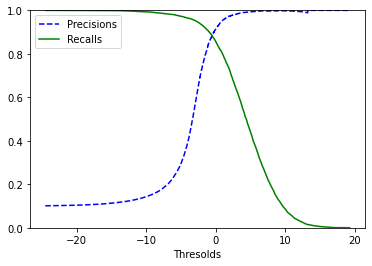

In [50]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precisions")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recalls") 
plt.xlabel("Thresolds")
plt.legend(loc= "upper left")
plt.ylim([0,1])
plt.show()